# Framingham Heart Study para predecir fumadores

In [1]:
#Para esta tarea utilizaremos el dataset de https://www.geeksforgeeks.org/ml-heart-disease-prediction-using-logistic-regression/ (framingham.csv)
#El data set contiene varios datos clinicos y ha sido utilizado para predecir si el paciente tiene un riesgo de enfermedad cardiovascular en los prox. 10 años.
#Contiene 15 variables clinicas por paciente y una variable TenYearCHD, que es el objetivo que dice si si se encontró riesgo de enfermedad al corazón.
#En lugar de predecir TenYearCHD, usamos currentSmoker donde 1 es fumador, 0 no fuma
#male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,




In [2]:
#Cargar el data set
import pandas as pd
df = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240307152534/framingham.csv")
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#Cuantos datos faltan?  Utilizamos isnull para checar cuales casillas están vacias (na) y .sum para ver la cantidad total
df.isnull().sum()

#Las eliminamos para simplificar
df = df.dropna()
df.shape

(3658, 16)

In [4]:
#currentSmoker es nuestra variable a predecir
y = df['currentSmoker']

#Todas las demas variables van a ayudar a predecir
X = df.drop(['currentSmoker'], axis=1)

X.dtypes

male                 int64
age                  int64
education          float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# Escalación de datos


In [5]:
#Vamos a tener que escalar algunos datos, esto signfica normalizar los resultados para que variables
#con valores grandes no dominen al modelo de regresión logistica.
#Por ejemplo, no podemos tomar en cuenta colesterol con el peso (en la formula) que tiene ahorita (rango de 100 y 300)
#Y meterlo a una ecucación donde esté la edad (30-80) y BMI (15-45)
#StandardScaler les pone una media de 0 y desviacion estandar de 1 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=X.columns).head()


,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.119755,-1.232580,1.975209,-0.757169,-0.176901,-0.075987,-0.672860,-0.166784,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044,-0.423815
1,-0.893053,-0.414905,0.019249,-0.757169,-0.176901,-0.075987,-0.672860,-0.166784,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883,-0.423815
2,1.119755,-0.181283,-0.958730,0.920689,-0.176901,-0.075987,-0.672860,-0.166784,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920,-0.423815
3,-0.893053,1.337256,0.997229,1.759618,-0.176901,-0.075987,1.486194,-0.166784,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782,2.359518
4,-0.893053,-0.414905,0.997229,1.172368,-0.176901,-0.075987,-0.672860,-0.166784,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672,-0.423815


# Dividir en entrenamiento y prueba

In [6]:
#Utilizamos train para entrenar el modelo y evaluamos con test

In [7]:
from sklearn.model_selection import train_test_split

# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Verificamos las dimensiones de cada conjunto
print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (2926, 15)
Prueba: (732, 15)


# Entrenamiento del modelo

In [8]:
#Para la predicción utilizaremos regresión logistica, calcula la probabilidad de que una muestra pertenzca a una clase

In [9]:
from sklearn.linear_model import LogisticRegression

# Creacion y entrenamiento del modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Verificamos que se haya entrenado correctamente
print("Modelo entrenado correctamente.")

Modelo entrenado correctamente.


# Evaluar el modelo

In [10]:
# Podemos utilizar la precisión para checar cuantos predijo bien
from sklearn.metrics import classification_report

# Predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Resultados de la evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       383
           1       1.00      0.94      0.97       349

    accuracy                           0.97       732
   macro avg       0.97      0.97      0.97       732
weighted avg       0.97      0.97      0.97       732



# Vamos a visualizar datooos! :D 

In [ ]:
#Es mas facil presentar datos y correlaciones así, fuman mas los jovenes? 
#A partir de que edad se empieza a dejar de fumar?

C:\Users\ricar\AppData\Local\Temp\ipykernel_9128\4116228698.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='¿Fuma actualmente?')


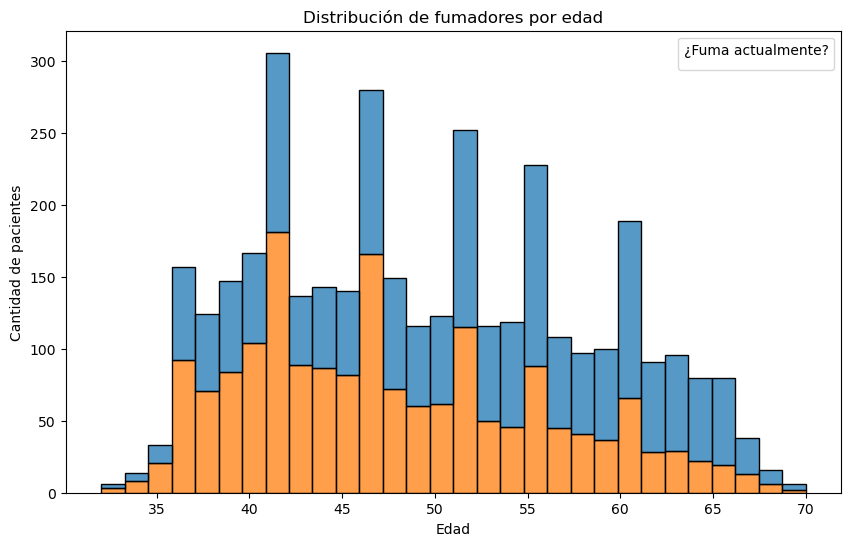

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una nueva columna legible
df['smoker_str'] = df['currentSmoker'].map({0: 'No fuma', 1: 'Fuma'})

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='smoker_str', bins=30, multiple='stack')

plt.title('Distribución de fumadores por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de pacientes')
plt.legend(title='¿Fuma actualmente?')
plt.show()


Donde X es la edad, Y es cantidad de pacientes
- Azul = no fumna
- Naranja = si fuma

Podemos ver entonces que:
* entre 40 y 45 años son los que mas están registrados.
* A partir de los 60, baja la frecuencia de fumadores bastante.
* La población total (numero de pacientes) reduce de forma general a partir de los 65 años qepd


# Creacion de la API 

La API va a recibir una solictiud HTTP con datos en formato json, se escalarán igual, y utilizamos regresión para predicir su fuma
Devuelve un json con "es_fumador = si/no" y "probabilidad_fuma = valor entre 0 y 1"

In [12]:
from flask import Flask, request, jsonify
import numpy as np
from werkzeug.serving import run_simple
import threading

# API 
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = np.array([data[col] for col in X.columns]).reshape(1, -1)
        features_scaled = scaler.transform(features)
        prediction = int(model.predict(features_scaled)[0])
        prob = model.predict_proba(features_scaled)[0]
        return jsonify({
            'es_fumador': 'Sí' if prediction == 1 else 'No',
            'probabilidad_no_fuma': round(prob[0], 3),
            'probabilidad_fuma': round(prob[1], 3)
        })
    except Exception as e:
        return jsonify({'error': str(e)})

# Ejecutar la API en un hilo separado
def run_api():
    run_simple("localhost", 5000, app)

thread = threading.Thread(target=run_api)
thread.start()


 * Running on http://localhost:5000
Press CTRL+C to quit


# Utilización de la API

In [13]:
import requests
#Estos son los datos que ingresa el dr, del paciente
entrada = {
    'male': 1,
    'age': 45,
    'education': 2,
    'cigsPerDay': 10,
    'BPMeds': 0,
    'prevalentStroke': 0,
    'prevalentHyp': 1,
    'diabetes': 0,
    'totChol': 220,
    'sysBP': 135,
    'diaBP': 85,
    'BMI': 26.5,
    'heartRate': 78,
    'glucose': 90,
    'TenYearCHD': 0
}

res = requests.post("http://localhost:5000/predict", json=entrada)
print(res.json())


C:\Users\ricar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [13/Apr/2025 13:03:21] "POST /predict HTTP/1.1" 200 -


{'es_fumador': 'Sí', 'probabilidad_fuma': 1.0, 'probabilidad_no_fuma': 0.0}


In [ ]:
Y asi predecimos a los fumadores! Gracias por leer :D